In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.


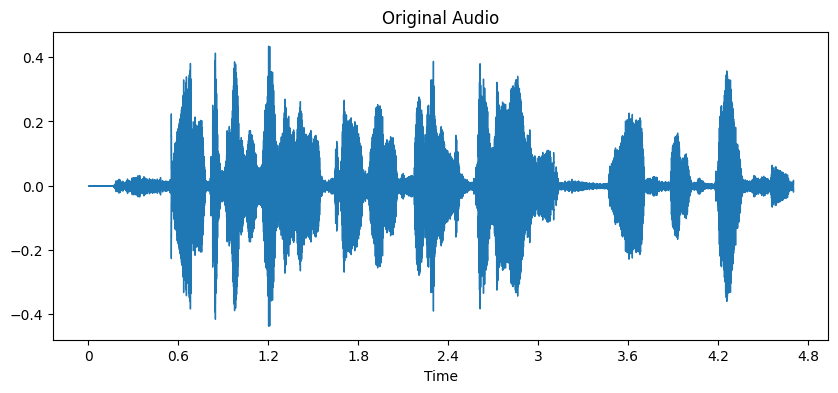

In [3]:
original_audio_path = "cherry.wav"
y, sr = librosa.load(original_audio_path)

# Plot and listen to the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.show()

ipd.Audio(y, rate=sr)  # Listen to the original audio



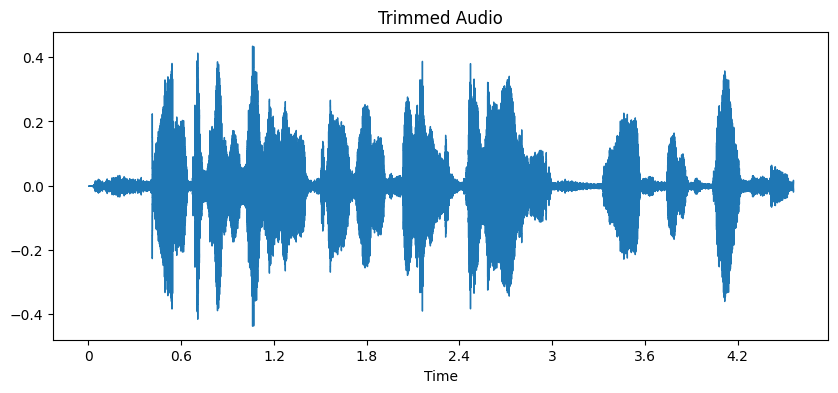

In [4]:
# Trim the silence using librosa.effects.trim()
trimmed_y, index = librosa.effects.trim(y)

# Plot and listen to the trimmed audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(trimmed_y, sr=sr)
plt.title('Trimmed Audio')
plt.show()

ipd.Audio(trimmed_y, rate=sr)  # Listen to the trimmed audio


A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

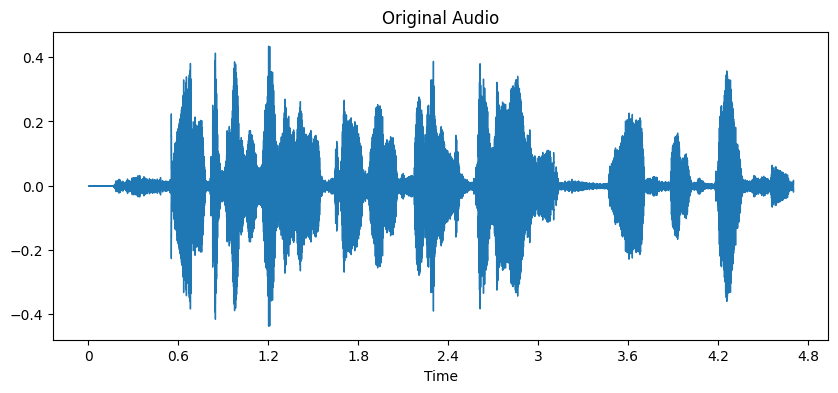

In [5]:
# Load the original audio file
original_audio_path = "cherry.wav"
y, sr = librosa.load(original_audio_path)

# Plot and listen to the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.show()

ipd.Audio(y, rate=sr)  # Listen to the original audio



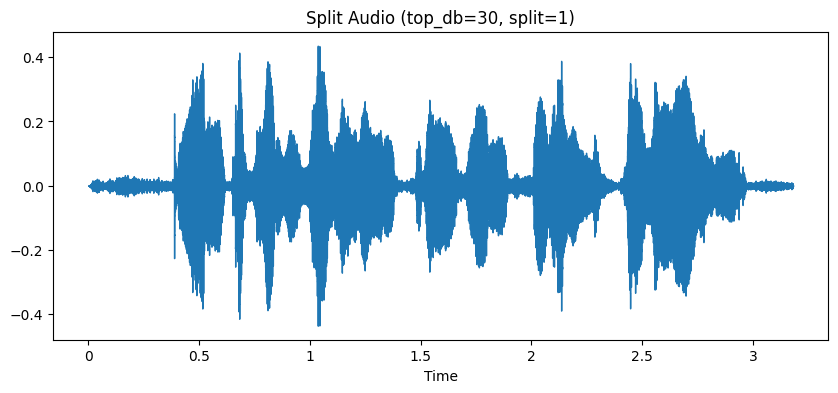

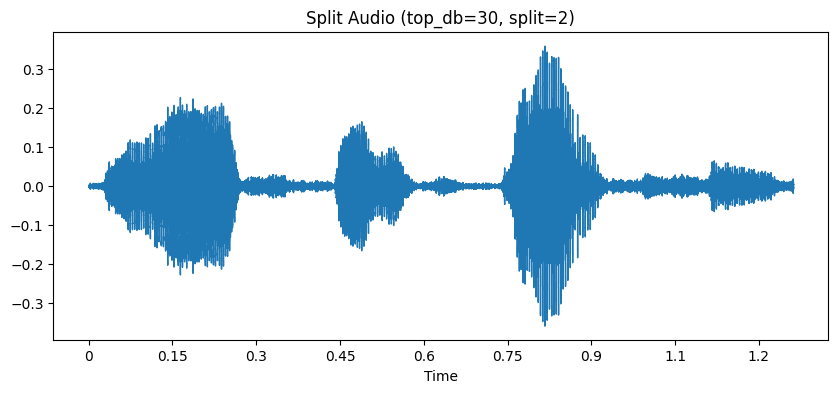

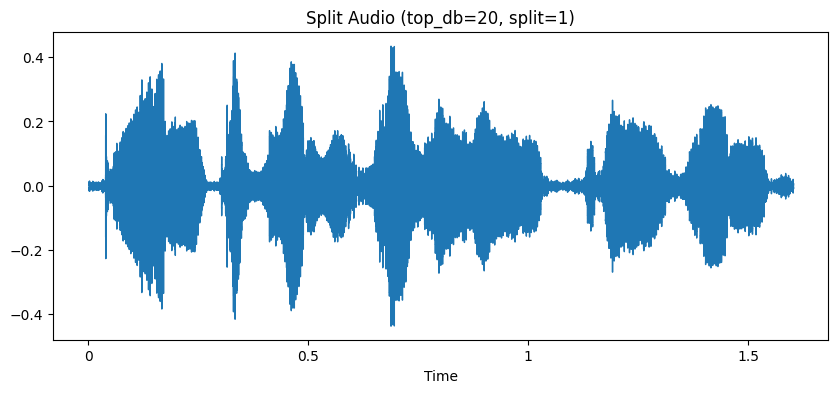

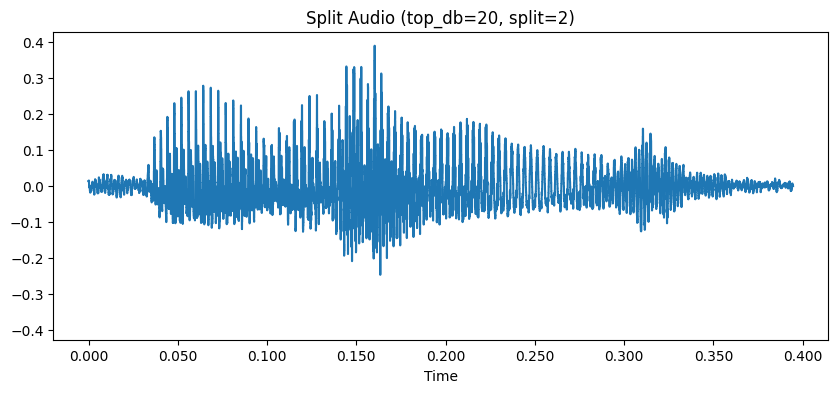

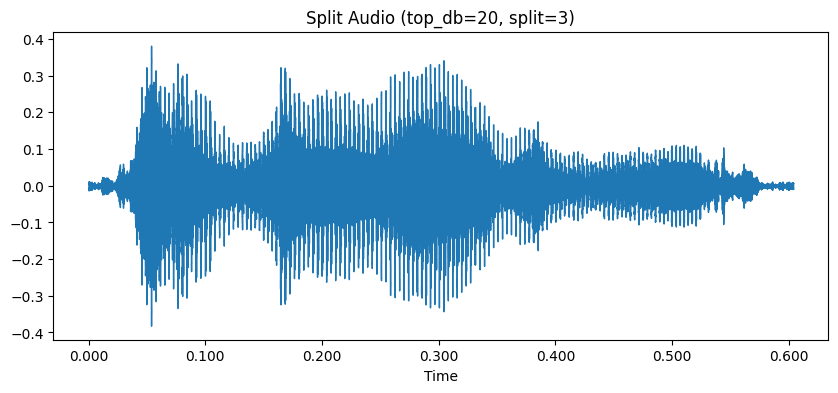

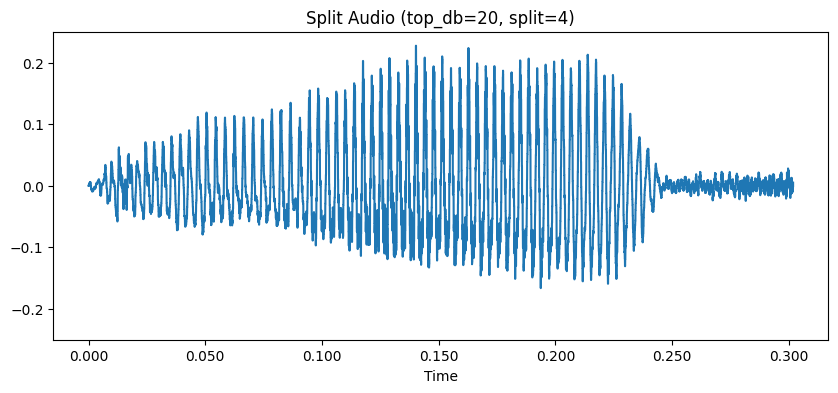

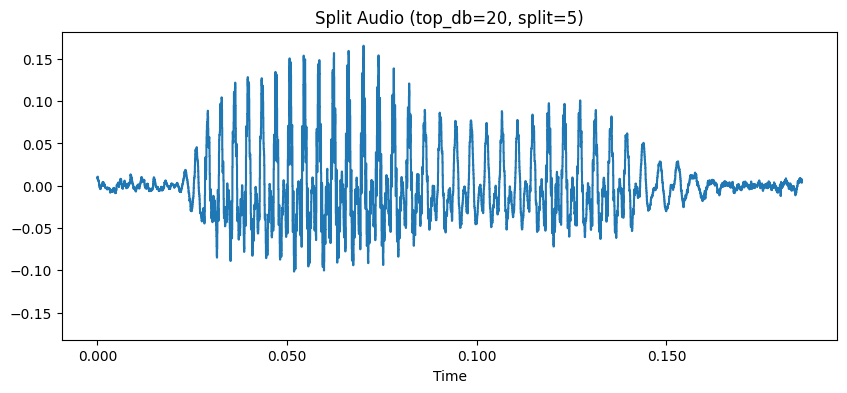

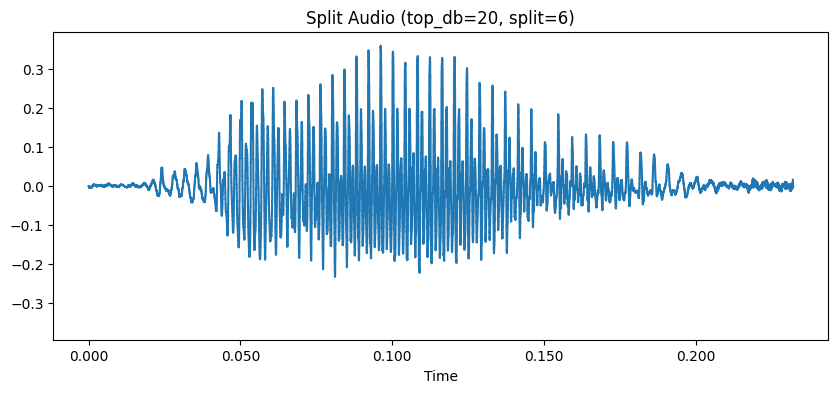

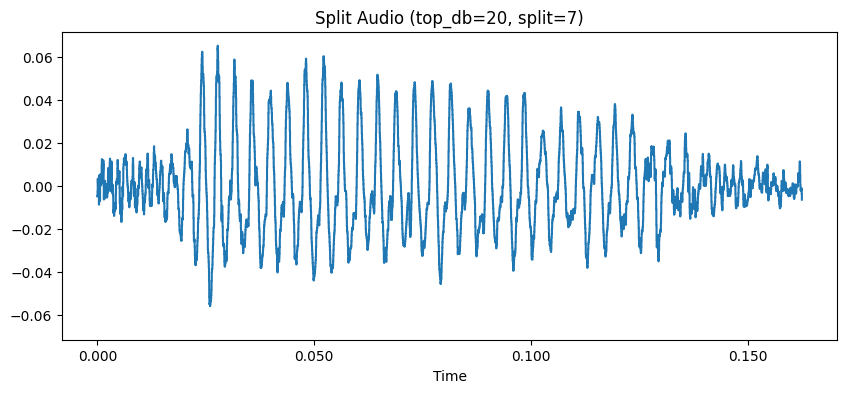

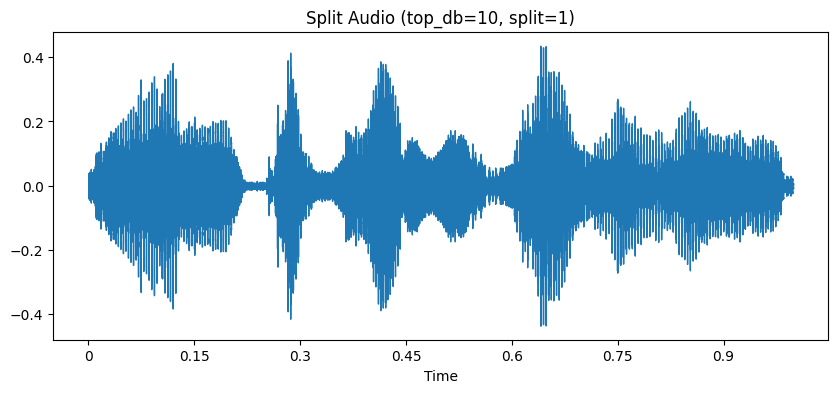

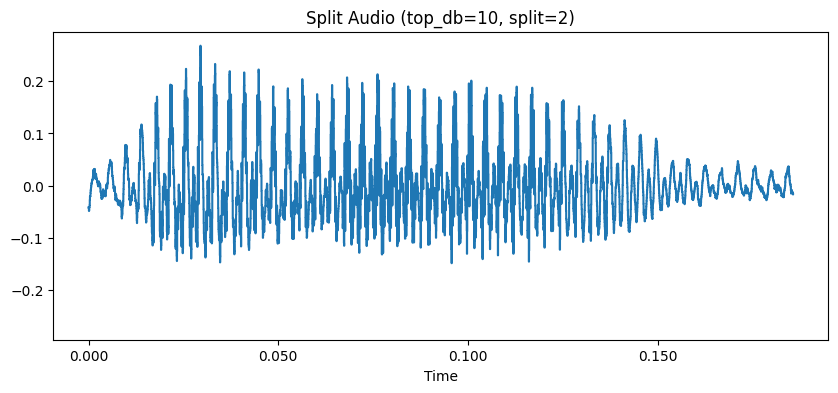

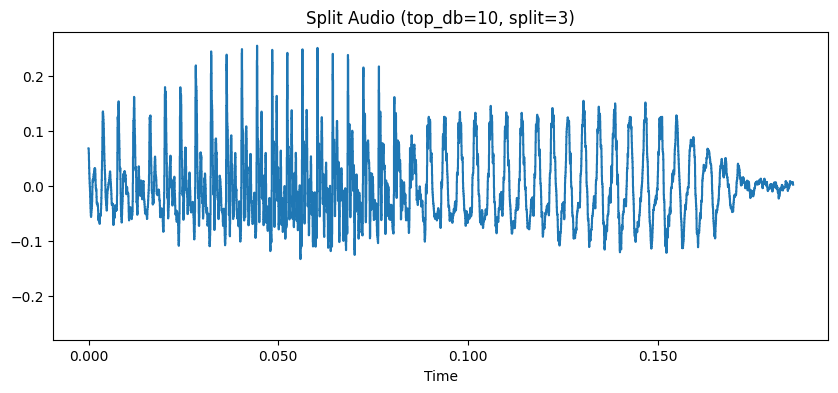

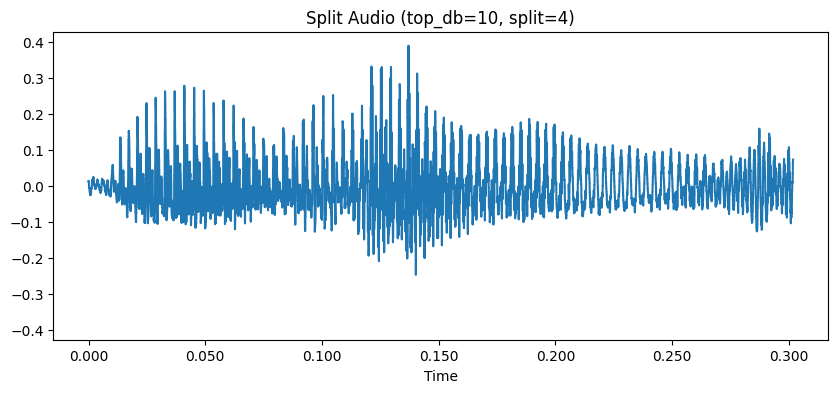

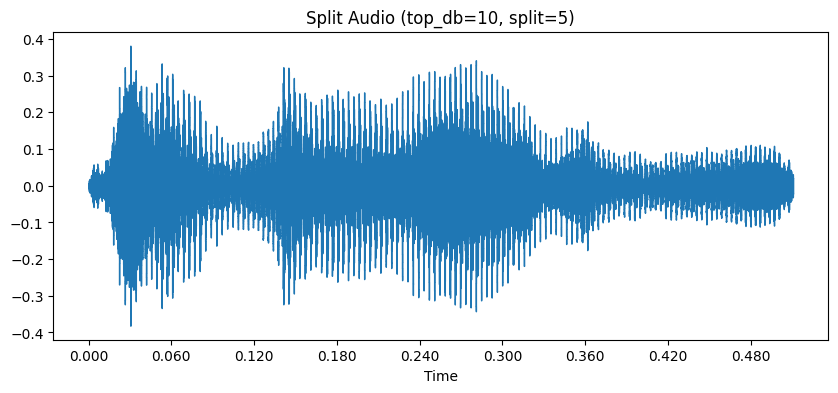

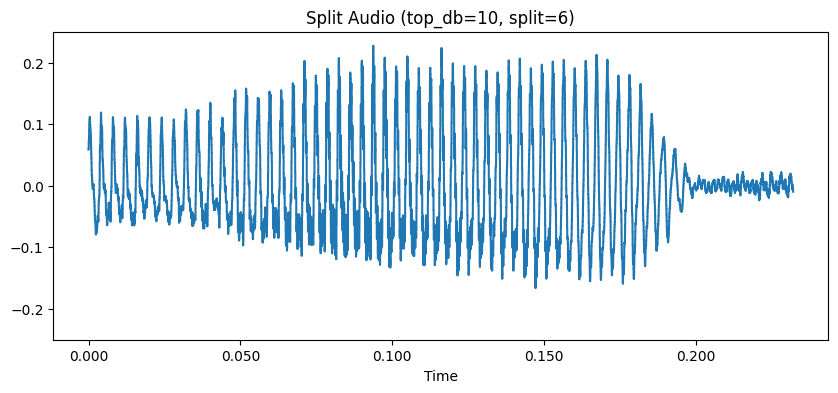

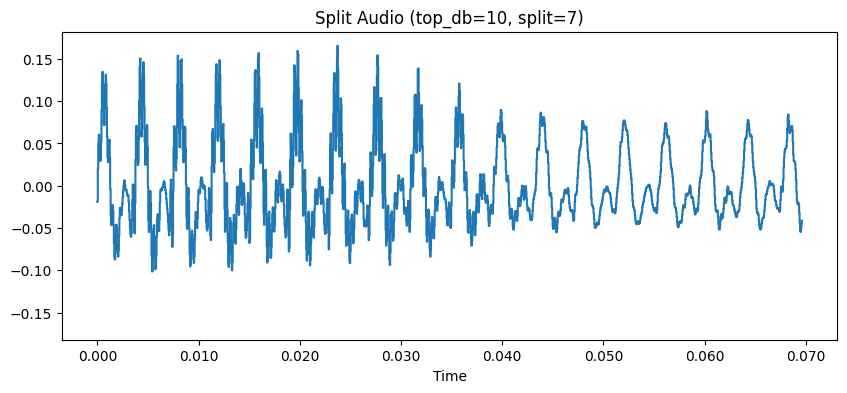

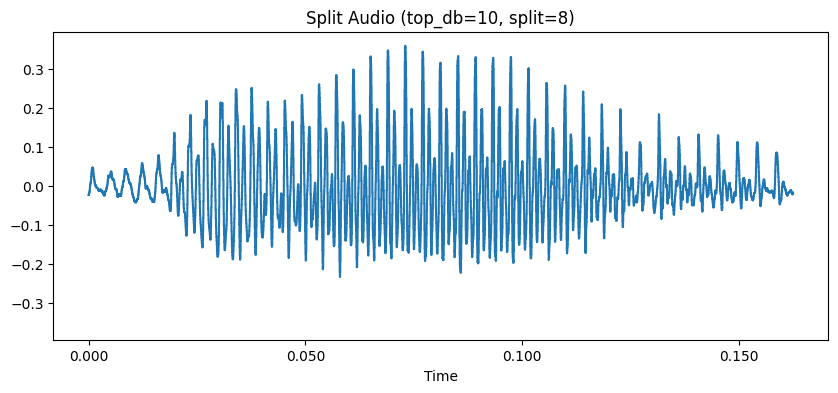

In [10]:
top_db_values = [30, 20, 10]  # You can adjust these values

for top_db in top_db_values:
    splits = librosa.effects.split(y, top_db=top_db)

    # Plot and listen to each split
    for i, split in enumerate(splits):
        split_audio = y[split[0]:split[1]]

        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(split_audio, sr=sr)
        plt.title(f'Split Audio (top_db={top_db}, split={i+1})')
        plt.show()

        ipd.display(ipd.Audio(split_audio, rate=sr))  # Display the split audio


A3.paper

In [12]:
import numpy as np

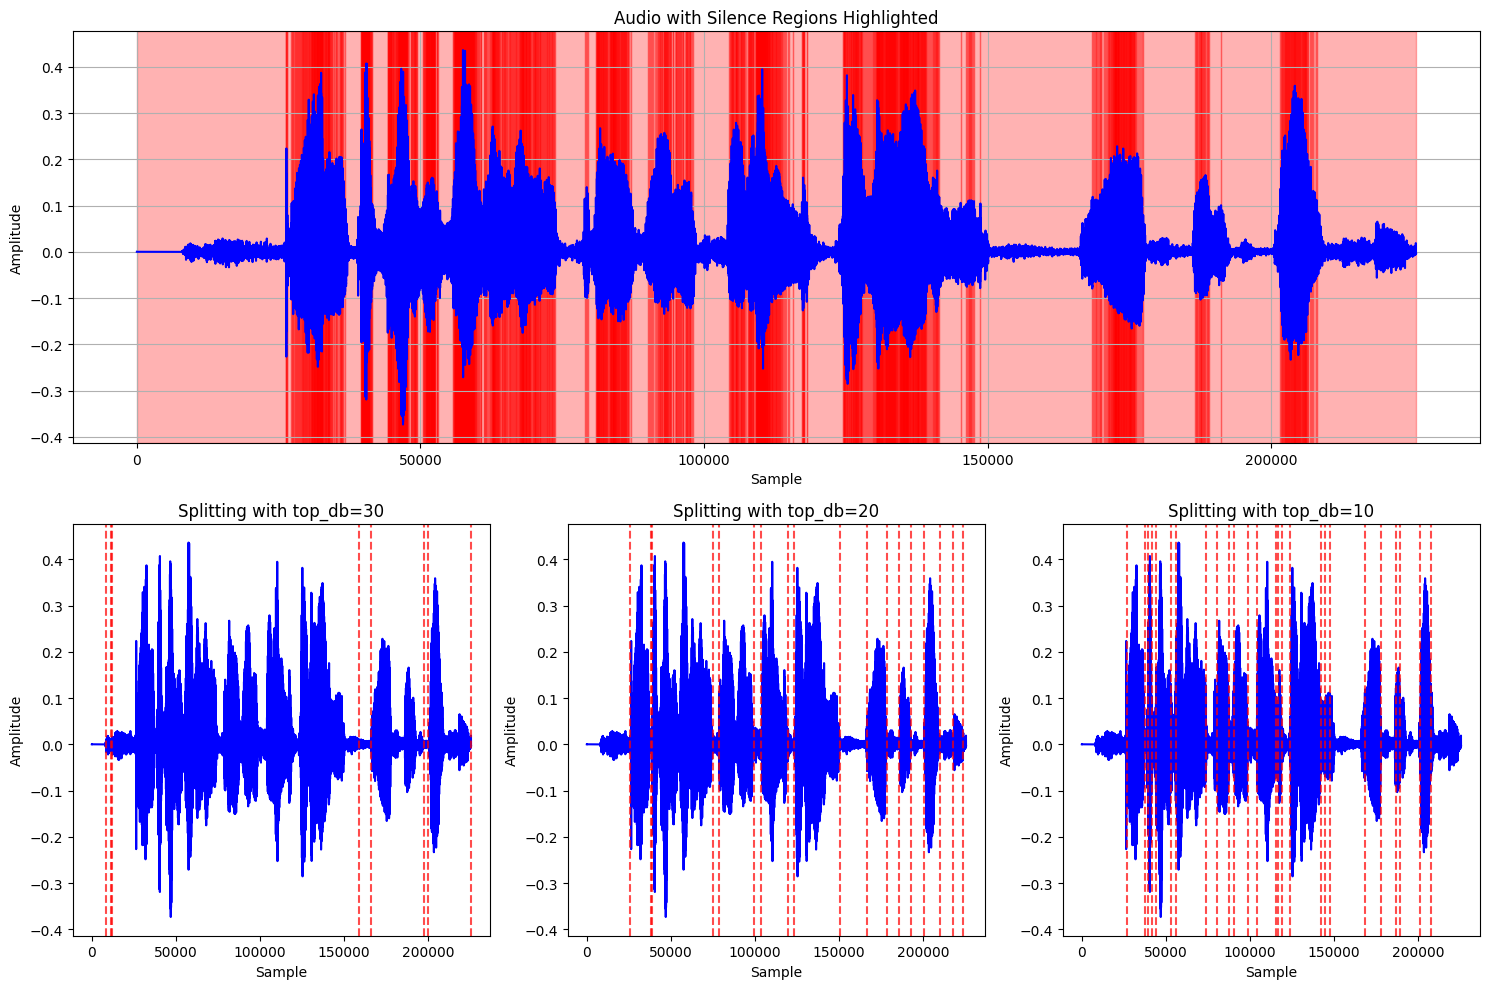

In [15]:
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "cherry.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [30,20,10]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()